In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\alish\OneDrive\Desktop\freelance\Predictive Disenrollment.xlsx"
df = pd.read_excel(file_path, sheet_name='Predictive Disenrollment')

# Basic info and data types
print("Dataset Info:")
print(df.info())
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Drop unnecessary columns or handle missing values as needed
df['disenrollDate'] = pd.to_datetime(df['disenrollDate'])
df['deceasedDate'] = pd.to_datetime(df['deceasedDate'])


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73769 entries, 0 to 73768
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   patientId                         73769 non-null  int64         
 1   age                               73769 non-null  int64         
 2   minPeriod                         73769 non-null  object        
 3   maxPeriod                         73769 non-null  object        
 4   memberMonthsCount                 73769 non-null  int64         
 5   eligible_3_12_Months              73769 non-null  int64         
 6   eligible_13_24_Months             73769 non-null  int64         
 7   eligible_25_36_Months             73769 non-null  int64         
 8   eligible_37_Or_More_Months        73769 non-null  int64         
 9   activeFlag                        73769 non-null  int64         
 10  disenrollDate                   

Descriptive Statistics:
          patientId           age  memberMonthsCount  eligible_3_12_Months  \
count  7.376900e+04  73769.000000       73769.000000          73769.000000   
mean   4.344040e+06     73.992111          47.176592              0.093427   
min    1.360000e+02     21.000000           3.000000              0.000000   
25%    1.677904e+06     69.000000          28.000000              0.000000   
50%    5.222818e+06     74.000000          51.000000              0.000000   
75%    7.144109e+06     80.000000          70.000000              0.000000   
max    7.989127e+06    108.000000          70.000000              1.000000   
std    2.789204e+06      9.195713          22.230771              0.291032   

       eligible_13_24_Months  eligible_25_36_Months  \
count           73769.000000           73769.000000   
mean                0.131492               0.121270   
min                 0.000000               0.000000   
25%                 0.000000               0.000000  

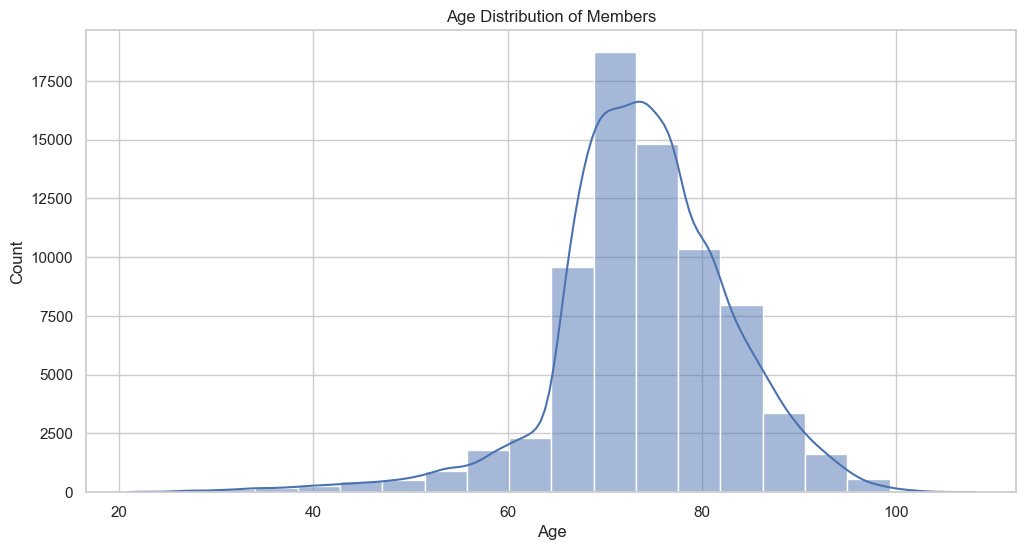

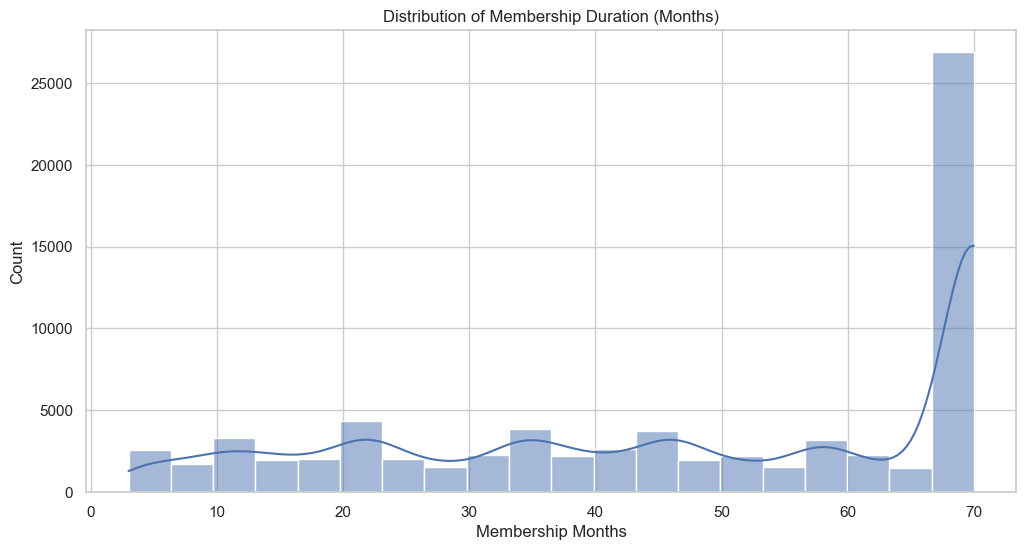

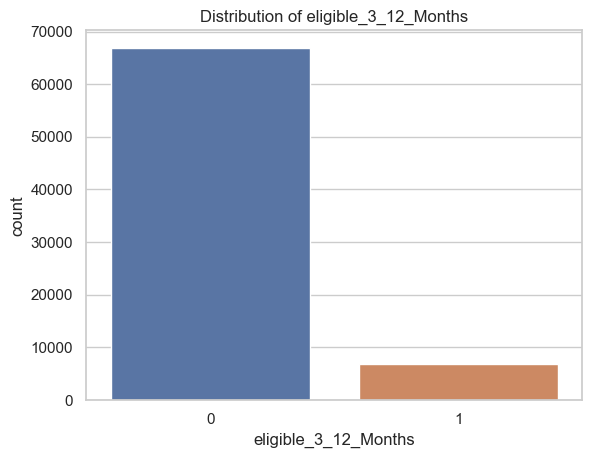

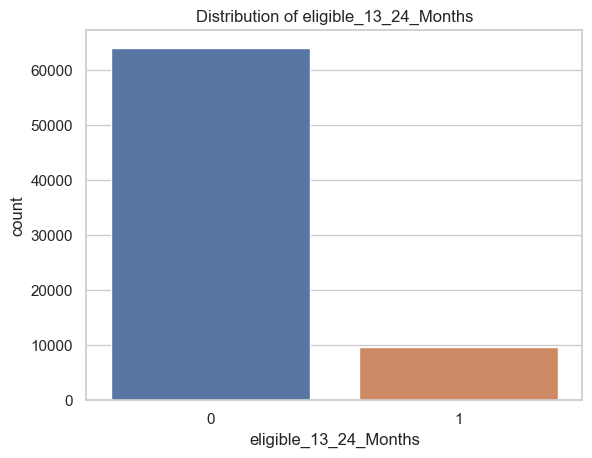

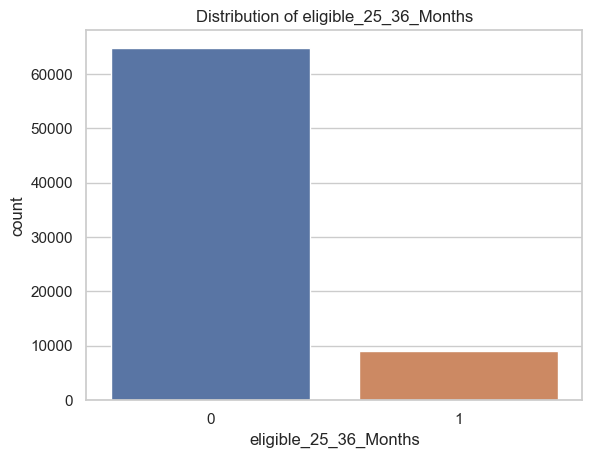

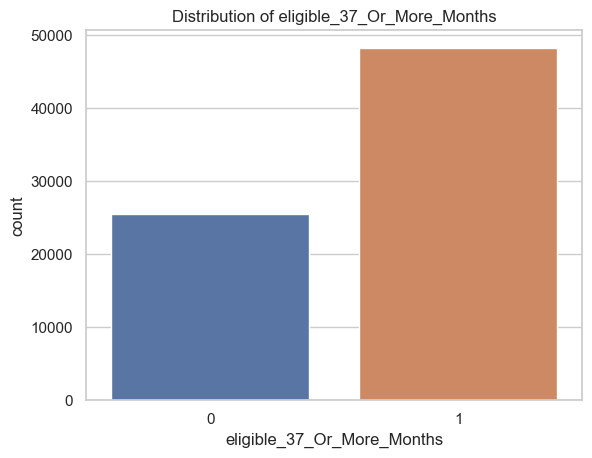

In [61]:
# Summary statistics
print("Descriptive Statistics:")
print(df.describe())

# Univariate analysis of continuous variables
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title("Age Distribution of Members")
plt.xlabel("Age")
plt.show()

# Distribution of member months count
plt.figure(figsize=(12, 6))
sns.histplot(df['memberMonthsCount'], kde=True, bins=20)
plt.title("Distribution of Membership Duration (Months)")
plt.xlabel("Membership Months")
plt.show()

# Visualizing categorical variables
categorical_vars = ['eligible_3_12_Months', 'eligible_13_24_Months', 'eligible_25_36_Months', 'eligible_37_Or_More_Months']
for var in categorical_vars:
    sns.countplot(data=df, x=var)
    plt.title(f"Distribution of {var}")
    plt.show()


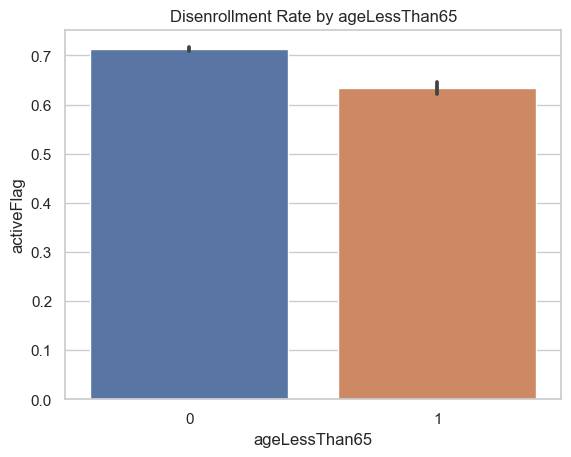

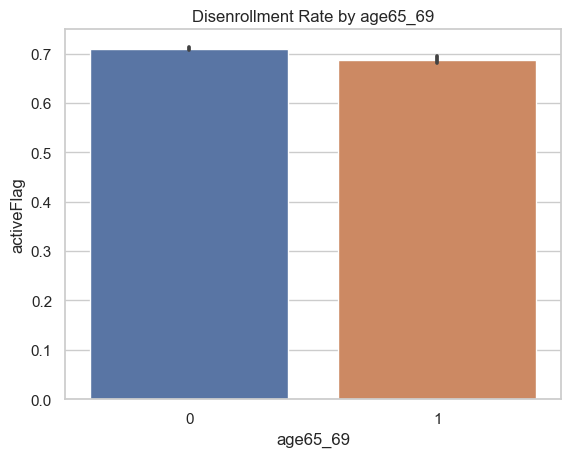

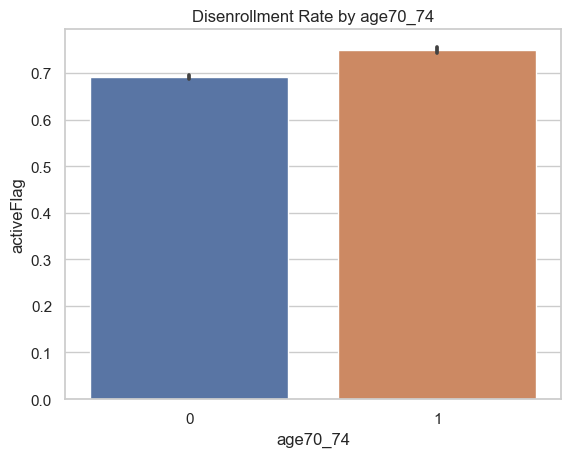

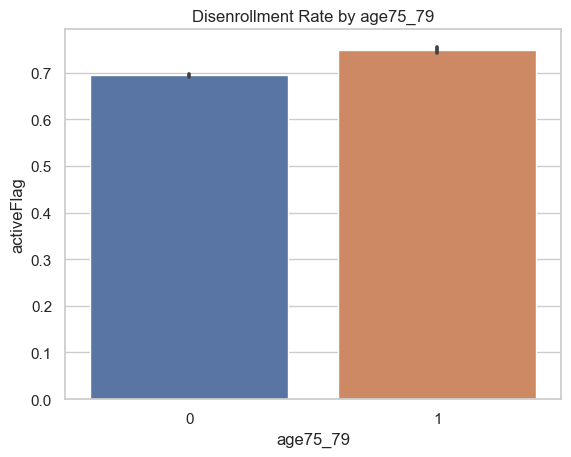

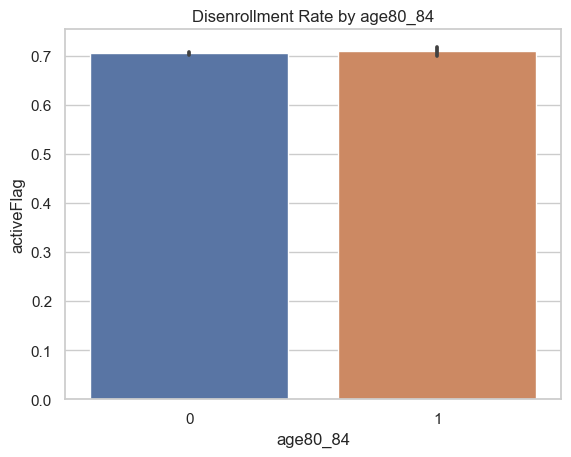

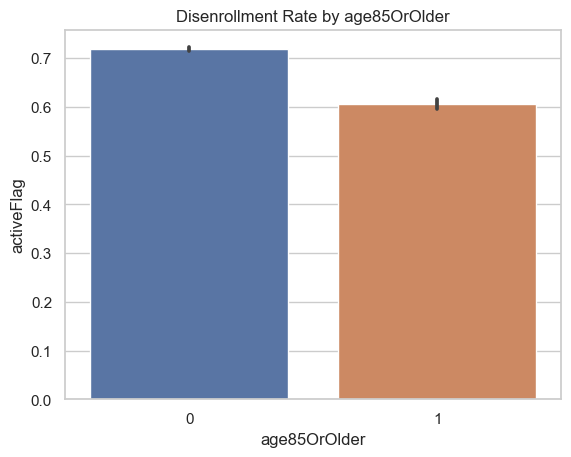

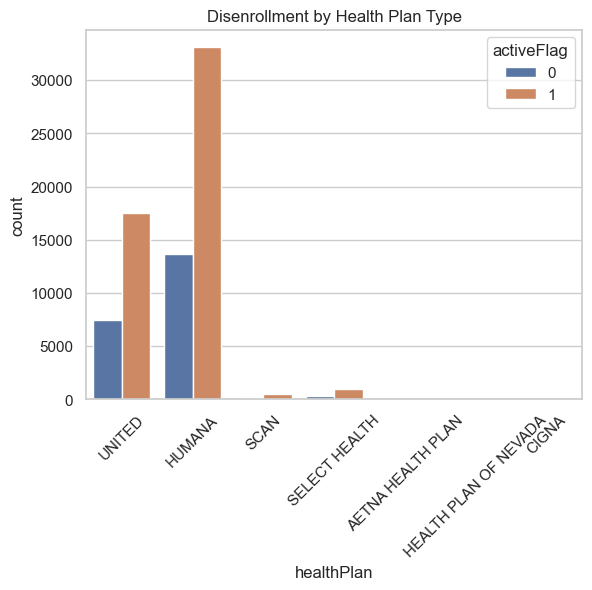

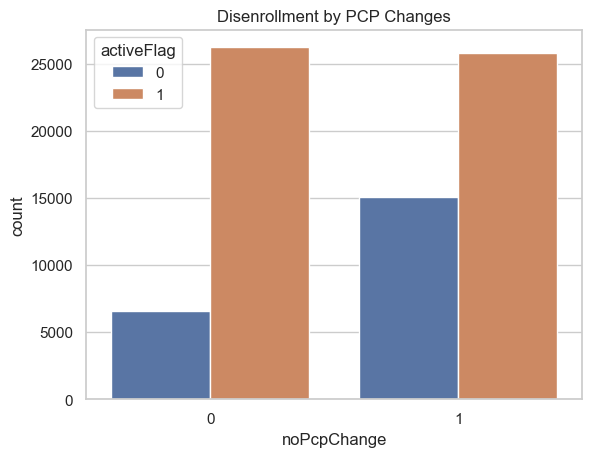

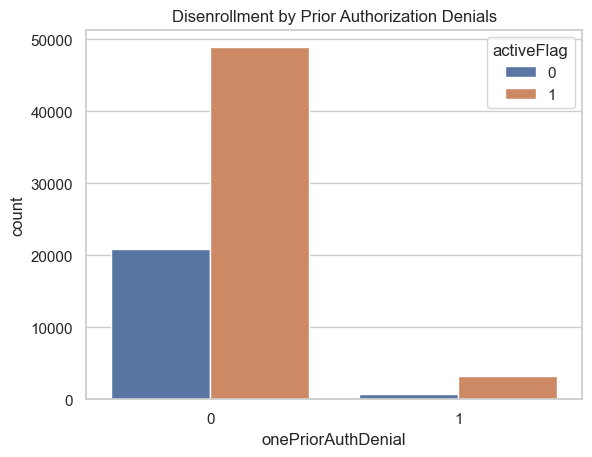

In [62]:
# Investigate the relationship between age groups and disenrollment
age_groups = ['ageLessThan65', 'age65_69', 'age70_74', 'age75_79', 'age80_84', 'age85OrOlder']
for age_group in age_groups:
    sns.barplot(data=df, x=age_group, y='activeFlag')
    plt.title(f"Disenrollment Rate by {age_group}")
    plt.show()

# Investigate the relationship between health plan type and disenrollment
sns.countplot(data=df, x='healthPlan', hue='activeFlag')
plt.title("Disenrollment by Health Plan Type")
plt.xticks(rotation=45)
plt.show()

# Check patterns in PCP changes and prior authorizations denials
sns.countplot(data=df, x='noPcpChange', hue='activeFlag')
plt.title("Disenrollment by PCP Changes")
plt.show()

sns.countplot(data=df, x='onePriorAuthDenial', hue='activeFlag')
plt.title("Disenrollment by Prior Authorization Denials")
plt.show()


In [63]:
# Importing additional libraries needed for analysis
from scipy.stats import chi2_contingency, pearsonr
import statsmodels.api as sm

# Preparing the report by analyzing each component systematically.

# First, checking distribution of activeFlag for active (1) and inactive (0) members
active_distribution = df['activeFlag'].value_counts(normalize=True)

# Examining the correlation between numerical variables and disenrollment (activeFlag)
correlation_results = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if col != 'activeFlag':
        corr, p_value = pearsonr(df[col], df['activeFlag'])
        correlation_results[col] = {'correlation': corr, 'p_value': p_value}

# Performing Chi-Square tests for categorical variables and activeFlag
chi_square_results = {}
for col in df.select_dtypes(include=['object', 'category']).columns:
    contingency_table = pd.crosstab(df[col], df['activeFlag'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_results[col] = {'chi2_statistic': chi2, 'p_value': p}

# Collecting basic statistical insights to compile into the report
age_distrib = df['age'].describe()
membership_distrib = df['memberMonthsCount'].describe()

# Analysis and structure of report
report = {
    "overview": {
        "active_distribution": active_distribution,
        "age_summary": age_distrib,
        "membership_duration_summary": membership_distrib
    },
    "correlation_analysis": correlation_results,
    "chi_square_analysis": chi_square_results
}

# Displaying the report's initial structure for validation
report

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


{'overview': {'active_distribution': activeFlag
  1    0.70611
  0    0.29389
  Name: proportion, dtype: float64,
  'age_summary': count    73769.000000
  mean        73.992111
  std          9.195713
  min         21.000000
  25%         69.000000
  50%         74.000000
  75%         80.000000
  max        108.000000
  Name: age, dtype: float64,
  'membership_duration_summary': count    73769.000000
  mean        47.176592
  std         22.230771
  min          3.000000
  25%         28.000000
  50%         51.000000
  75%         70.000000
  max         70.000000
  Name: memberMonthsCount, dtype: float64},
 'correlation_analysis': {'patientId': {'correlation': -0.00760590271975799,
   'p_value': 0.03884810345674438},
  'age': {'correlation': -0.005058085515955641, 'p_value': 0.1695086707984342},
  'memberMonthsCount': {'correlation': 0.3761201555914133, 'p_value': 0.0},
  'eligible_3_12_Months': {'correlation': -0.24688162710365036,
   'p_value': 0.0},
  'eligible_13_24_Months': {'c

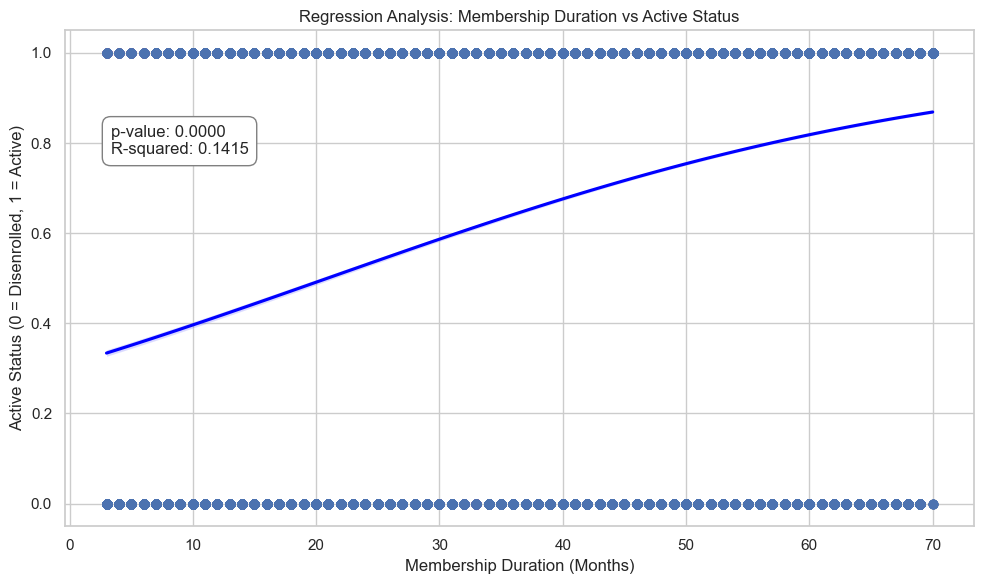

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             activeFlag   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                 1.216e+04
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:58:02   Log-Likelihood:                -41046.
No. Observations:               73769   AIC:                         8.210e+04
Df Residuals:                   73767   BIC:                         8.211e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3425      0.004     93.944      0.000       0.335       0.350
memberMonthsCount     0.0077   6.99e-05    110.250      0.000       0.008       0.008
==============================================================================
Omnibus:                    13098.524   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7661.138
Skew:                          -0.660   Prob(JB):                         0.00
Kurtosis:                       2.133   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Re-importing the necessary libraries for data manipulation, visualization, and analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Ensuring consistency in visualization style
sns.set(style="whitegrid")

# Conducting a regression analysis on 'memberMonthsCount' vs 'activeFlag' to understand relationship with disenrollment
# Preparing the data for regression
X = df[['memberMonthsCount']]
y = df['activeFlag']

# Adding a constant for the statsmodels OLS regression
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
p_value = model.pvalues['memberMonthsCount']
r_squared = model.rsquared

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='memberMonthsCount', y='activeFlag', data=df, logistic=True, scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
plt.title("Regression Analysis: Membership Duration vs Active Status")
plt.xlabel("Membership Duration (Months)")
plt.ylabel("Active Status (0 = Disenrolled, 1 = Active)")

# Annotating with p-value and R-squared
plt.annotate(f"p-value: {p_value:.4f}\nR-squared: {r_squared:.4f}", xy=(0.05, 0.75), xycoords='axes fraction', fontsize=12, 
             bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

# Providing the model summary to include in the methodology description
model_summary = model.summary()
model_summary


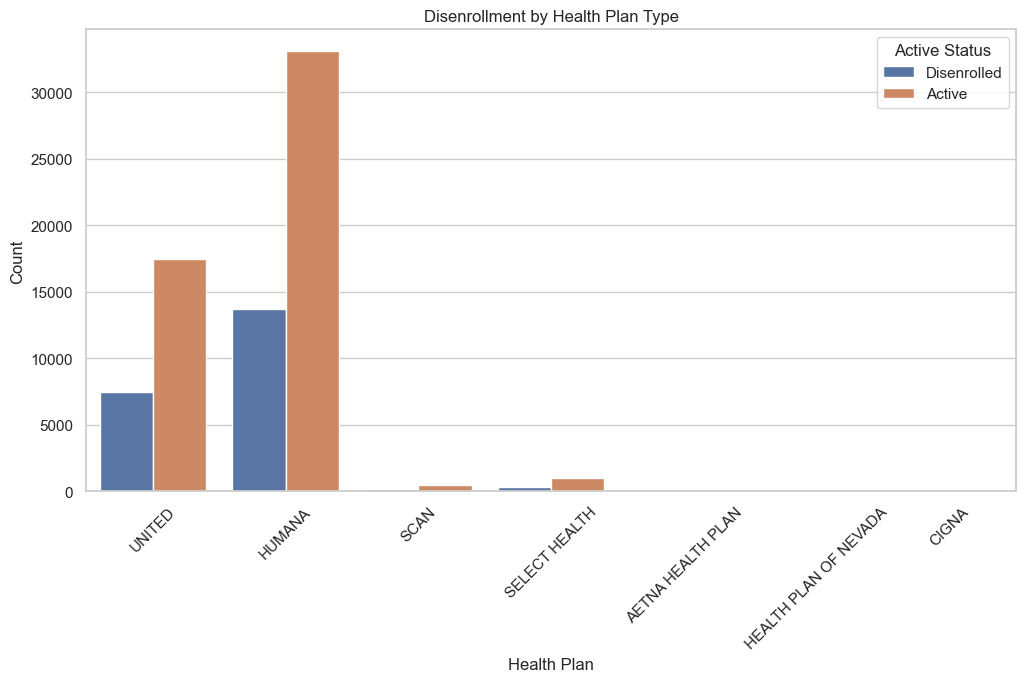

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(x='healthPlan', hue='activeFlag', data=df)
plt.title("Disenrollment by Health Plan Type")
plt.xlabel("Health Plan")
plt.ylabel("Count")
plt.legend(title="Active Status", labels=["Disenrolled", "Active"])
plt.xticks(rotation=45)
plt.show()


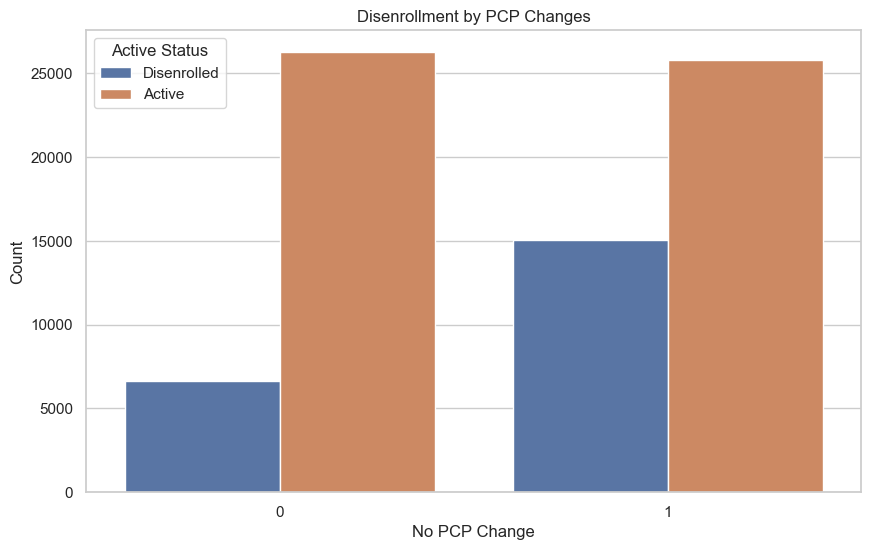

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='noPcpChange', hue='activeFlag', data=df)
plt.title("Disenrollment by PCP Changes")
plt.xlabel("No PCP Change")
plt.ylabel("Count")
plt.legend(title="Active Status", labels=["Disenrolled", "Active"])
plt.show()


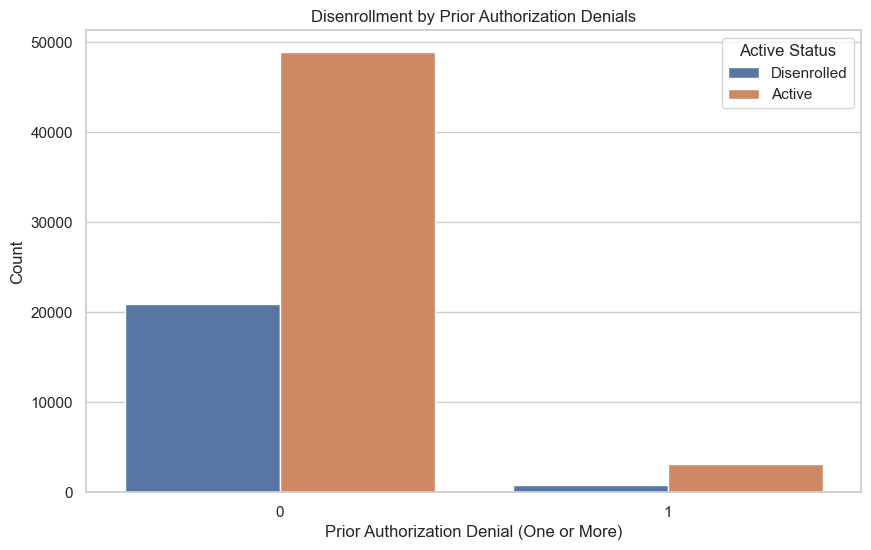

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='onePriorAuthDenial', hue='activeFlag', data=df)
plt.title("Disenrollment by Prior Authorization Denials")
plt.xlabel("Prior Authorization Denial (One or More)")
plt.ylabel("Count")
plt.legend(title="Active Status", labels=["Disenrolled", "Active"])
plt.show()


In [68]:
# Importing additional libraries required for multivariate and logistic regression analysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np

# Preparing data for multivariate logistic regression analysis
# Encoding categorical variables (like health plan type) and scaling numerical ones for logistic regression
df_encoded = df.copy()
label_encoders = {}

# Encoding categorical variables
categorical_columns = ['healthPlan']
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Selecting significant features based on previous findings
X_multivariate = df_encoded[['memberMonthsCount', 'healthPlan', 'noPcpChange', 'onePriorAuthDenial']]
y_multivariate = df_encoded['activeFlag']

# Standardizing numerical variables for consistent scale
scaler = StandardScaler()
X_multivariate.loc[:, 'memberMonthsCount'] = scaler.fit_transform(X_multivariate[['memberMonthsCount']])

# Splitting the data for train-test logistic regression
X_train, X_test, y_train, y_test = train_test_split(X_multivariate, y_multivariate, test_size=0.3, random_state=42)

# Logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicting and calculating confidence metrics
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Regression coefficients for interpretation
coefficients = logistic_model.coef_

# Returning the results for documentation and plotting purposes
{
    "accuracy": accuracy,
    "confusion_matrix": conf_matrix,
    "classification_report": classification_rep,
    "roc_auc": roc_auc,
    "coefficients": coefficients
}

{'accuracy': 0.7120780805205368,
 'confusion_matrix': array([[ 1963,  4532],
        [ 1840, 13796]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.52      0.30      0.38      6495\n           1       0.75      0.88      0.81     15636\n\n    accuracy                           0.71     22131\n   macro avg       0.63      0.59      0.60     22131\nweighted avg       0.68      0.71      0.69     22131\n',
 'roc_auc': 0.7558308622784986,
 'coefficients': array([[ 0.86245804,  0.06184271, -0.80717889,  0.43249831]])}

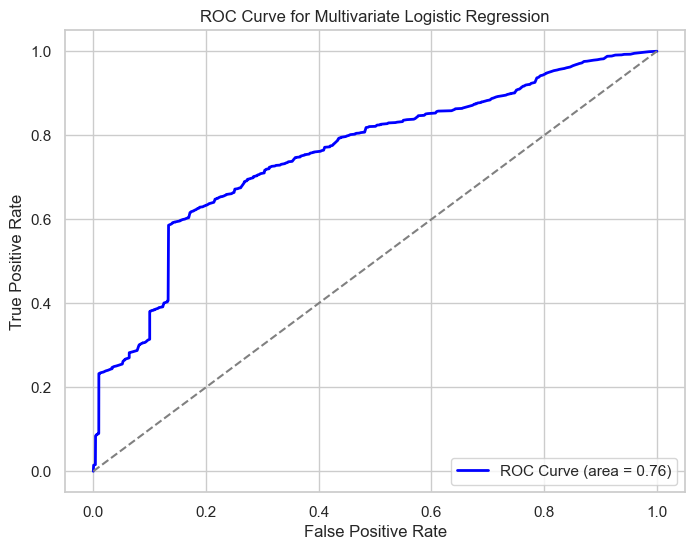

In [69]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multivariate Logistic Regression")
plt.legend(loc="lower right")
plt.show()

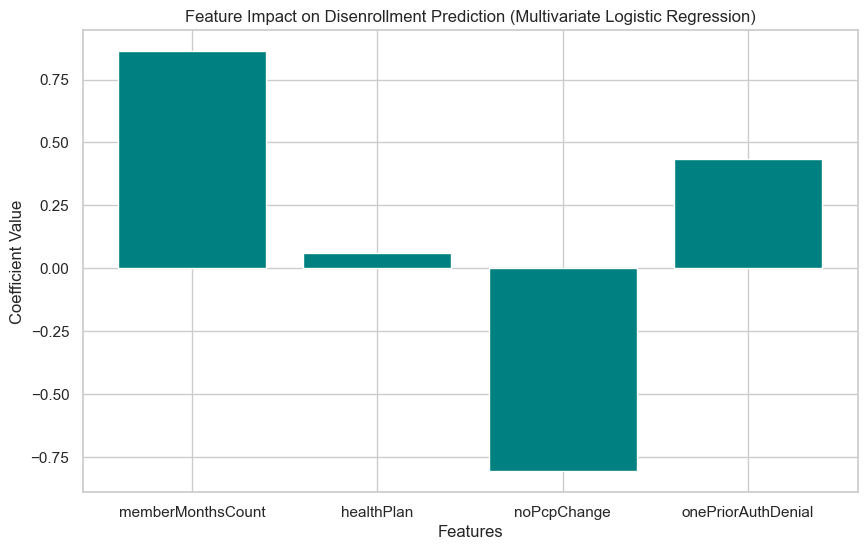

{'coefficients': {'memberMonthsCount': 0.8624580449988071,
  'healthPlan': 0.06184270888326542,
  'noPcpChange': -0.8071788941975208,
  'onePriorAuthDenial': 0.4324983099887219}}

In [70]:
# Re-importing necessary libraries to ensure all tools are available
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Coefficients for feature impact interpretation
coefficients = logistic_model.coef_[0]
features = X_multivariate.columns

# Plotting Coefficients
plt.figure(figsize=(10, 6))
plt.bar(features, coefficients, color='teal')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Impact on Disenrollment Prediction (Multivariate Logistic Regression)")
plt.show()

# Displaying key metrics
{
    "coefficients": dict(zip(features, coefficients))
}

In [71]:
# Importing additional libraries required for multivariate and logistic regression analysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np

# Preparing data for multivariate logistic regression analysis
# Encoding categorical variables (like health plan type) and scaling numerical ones for logistic regression
df_encoded = df.copy()
label_encoders = {}

# Encoding categorical variables
categorical_columns = ['healthPlan']
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Selecting significant features based on previous findings
X_multivariate = df_encoded[['memberMonthsCount', 'healthPlan', 'age', 'hospice', 'esrd']]
y_multivariate = df_encoded['activeFlag']

# Standardizing numerical variables for consistent scale
scaler = StandardScaler()
X_multivariate.loc[:, 'memberMonthsCount'] = scaler.fit_transform(X_multivariate[['memberMonthsCount']])

# Splitting the data for train-test logistic regression
X_train, X_test, y_train, y_test = train_test_split(X_multivariate, y_multivariate, test_size=0.3, random_state=42)

# Logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicting and calculating confidence metrics
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Regression coefficients for interpretation
coefficients = logistic_model.coef_

# Returning the results for documentation and plotting purposes
{
    "accuracy": accuracy,
    "confusion_matrix": conf_matrix,
    "classification_report": classification_rep,
    "roc_auc": roc_auc,
    "coefficients": coefficients
}


{'accuracy': 0.7381049206994713,
 'confusion_matrix': array([[ 2367,  4128],
        [ 1668, 13968]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.59      0.36      0.45      6495\n           1       0.77      0.89      0.83     15636\n\n    accuracy                           0.74     22131\n   macro avg       0.68      0.63      0.64     22131\nweighted avg       0.72      0.74      0.72     22131\n',
 'roc_auc': 0.7783209568885368,
 'coefficients': array([[ 0.94475223,  0.05276328, -0.01888588, -3.73848993, -0.99413415]])}

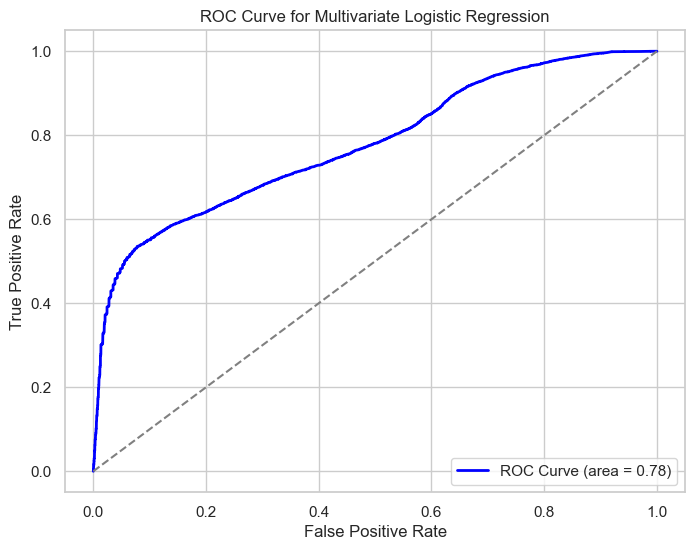

In [72]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multivariate Logistic Regression")
plt.legend(loc="lower right")
plt.show()


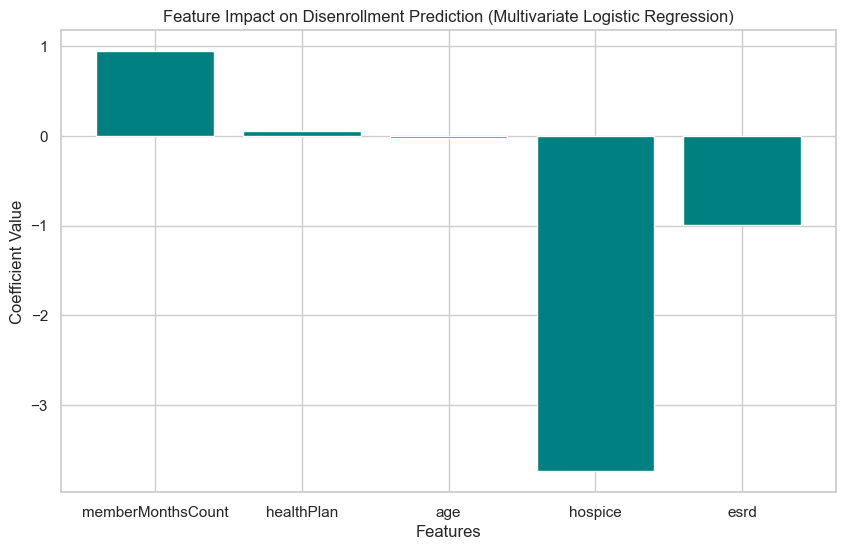

{'coefficients': {'memberMonthsCount': 0.9447522341151641,
  'healthPlan': 0.05276327523453298,
  'age': -0.018885879740511986,
  'hospice': -3.738489928141243,
  'esrd': -0.9941341526653943}}

In [73]:
# Re-importing necessary libraries to ensure all tools are available
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Coefficients for feature impact interpretation
coefficients = logistic_model.coef_[0]
features = X_multivariate.columns

# Plotting Coefficients
plt.figure(figsize=(10, 6))
plt.bar(features, coefficients, color='teal')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Impact on Disenrollment Prediction (Multivariate Logistic Regression)")
plt.show()

# Displaying key metrics
{
    "coefficients": dict(zip(features, coefficients))
}


In [74]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
file_path = r"C:\Users\alish\OneDrive\Desktop\freelance\Predictive Disenrollment.xlsx"
df = pd.read_excel(file_path)

# Handle missing values
# Imputing numerical columns with median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
imputer_num = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Imputing categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Convert 'deceasedDate' into a binary column where 1 represents a recorded date (indicating deceased)
df['deceased'] = df['deceasedDate'].notna().astype(int)
df.drop('deceasedDate', axis=1, inplace=True)  # Drop the original date column as it's no longer needed

# Identify any datetime columns and convert or drop them
datetime_cols = df.select_dtypes(include=['datetime']).columns
for col in datetime_cols:
    # Convert datetime to a binary representation indicating presence of a date
    df[col + '_exists'] = df[col].notna().astype(int)

# Drop the original datetime columns
df.drop(columns=datetime_cols, inplace=True)

# Convert categorical variables to numeric using LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Prepare features and target variable
X = df.drop(['patientId', 'activeFlag'], axis=1)  # Drop non-feature and target column
y = df['activeFlag']

# Initialize and fit the Random Forest Classifier to assess feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importances

maxPeriod                           0.415410
disenrollDate_exists                0.393600
memberMonthsCount                   0.061202
deceased                            0.033528
minPeriod                           0.030674
disenrolledDueToDeath               0.022236
eligible_3_12_Months                0.009187
establishedCare_NA                  0.008259
hospice                             0.006685
eligible_37_Or_More_Months          0.006011
noPcpChange                         0.004492
establishedCare_No_Visit            0.002084
eligible_25_36_Months               0.001001
establishedCare_0_30_Days           0.000959
twoPcpChange                        0.000933
threeOrMorePcpChange                0.000790
age                                 0.000565
eligible_13_24_Months               0.000507
age85OrOlder                        0.000327
onePcpChange                        0.000254
establishedCare_31_90_Days          0.000217
establishedCare_91_179_Days         0.000216
noPriorAut

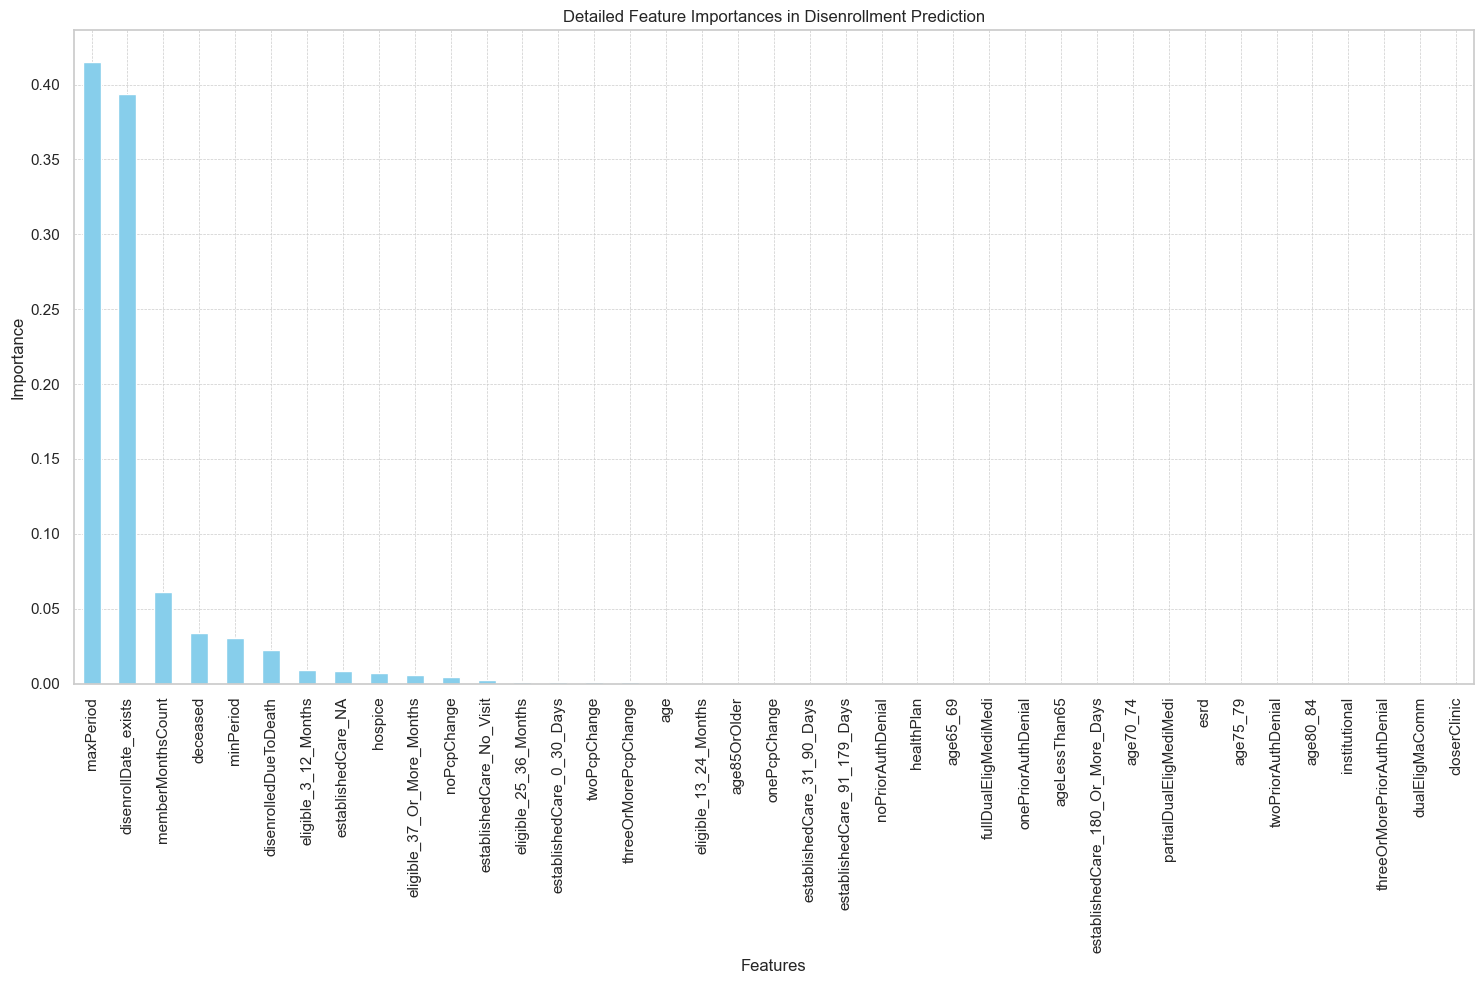

In [75]:
# Extract and sort all feature importances from the RandomForest model to display them
all_feature_importances = pd.Series(rf.feature_importances_, index=df.drop(['patientId', 'activeFlag'], axis=1).columns).sort_values(ascending=False)

# Create a bar chart for all feature importances
plt.figure(figsize=(15, 10))
all_feature_importances.plot(kind='bar', color='skyblue')
plt.title("Detailed Feature Importances in Disenrollment Prediction")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)  # Rotating the labels for better visibility
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



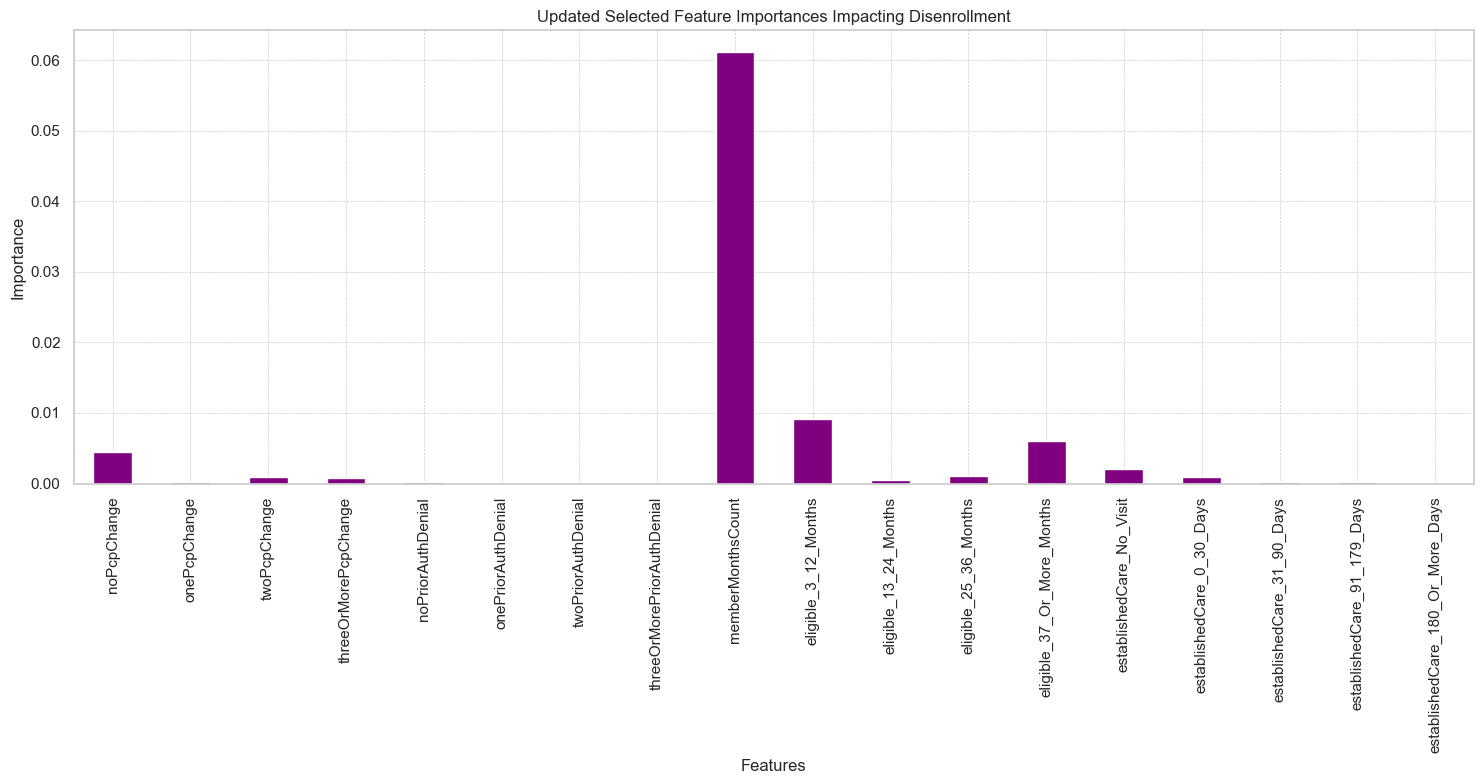

In [76]:
# Select features that might be more indicative of disenrollment due to service-related issues
selected_features = [
    'noPcpChange', 'onePcpChange', 'twoPcpChange', 'threeOrMorePcpChange',
    'noPriorAuthDenial', 'onePriorAuthDenial', 'twoPriorAuthDenial', 'threeOrMorePriorAuthDenial',
    'memberMonthsCount', 'eligible_3_12_Months', 'eligible_13_24_Months', 'eligible_25_36_Months', 'eligible_37_Or_More_Months',
    'establishedCare_No_Visit', 'establishedCare_0_30_Days', 'establishedCare_31_90_Days', 'establishedCare_91_179_Days', 'establishedCare_180_Or_More_Days'
]

# Refilter the feature importances for the updated selected features
relevant_feature_importances_updated = all_feature_importances.loc[selected_features]

# Plotting the updated filtered feature importances
plt.figure(figsize=(15, 8))
relevant_feature_importances_updated.plot(kind='bar', color='purple')
plt.title("Updated Selected Feature Importances Impacting Disenrollment")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



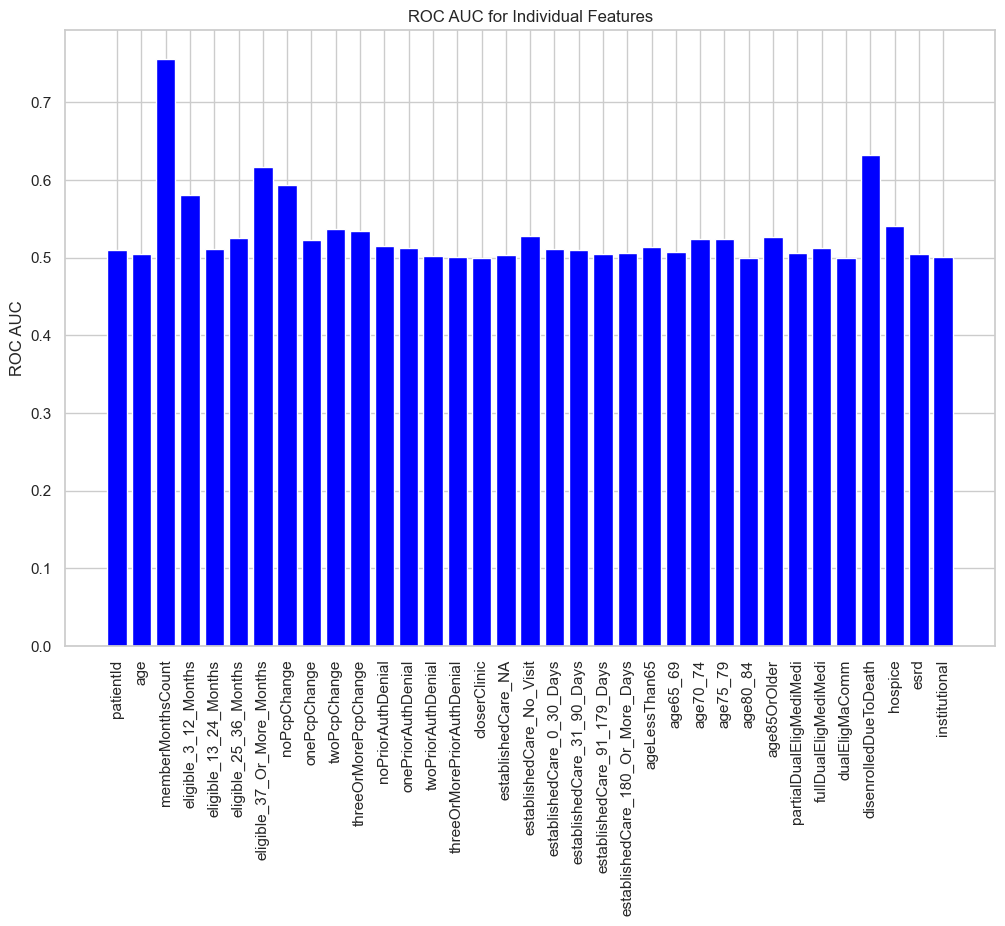

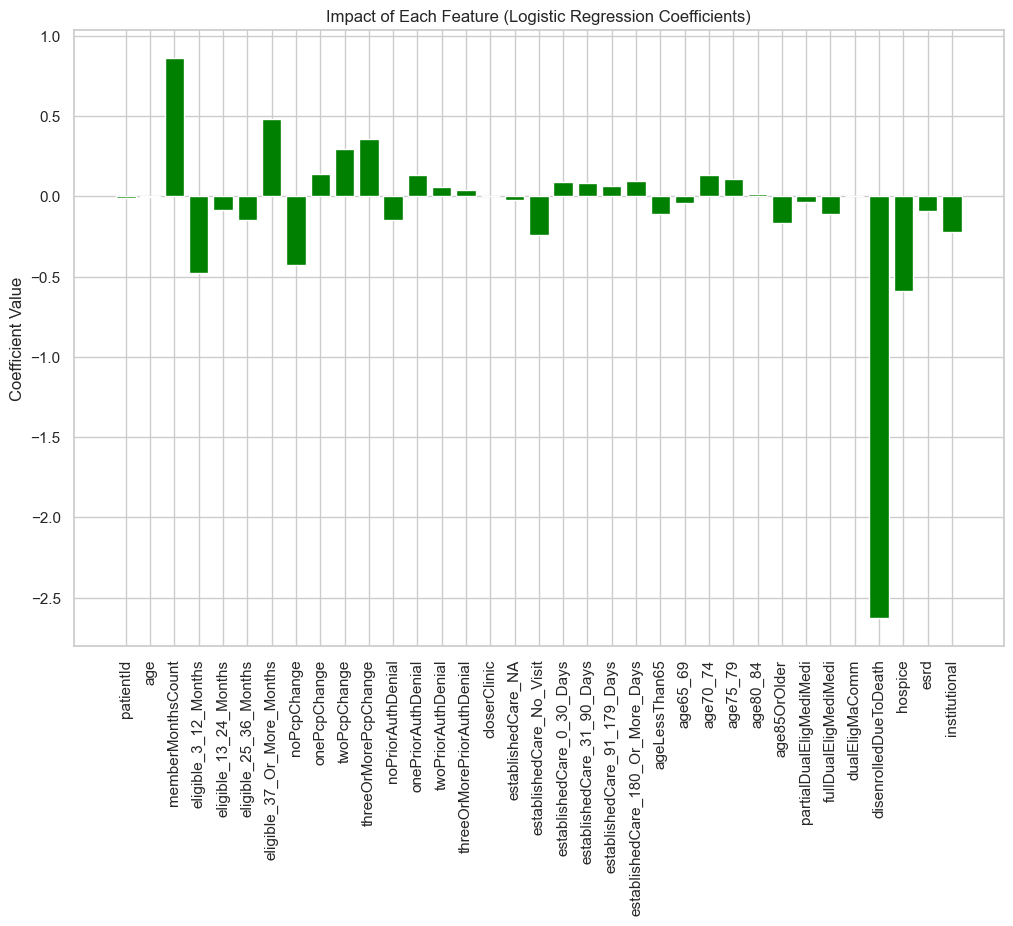

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Prepare your dataset
# Assuming 'df' is your DataFrame and 'activeFlag' is your target variable

# Initialize results storage
feature_impacts = {}
roc_aucs = {}

# Analyze each feature independently
for feature in df.columns.drop('activeFlag'):  # Exclude the target variable
    if df[feature].dtype in ['int64', 'float64']:  # Make sure the feature is numeric
        X = df[[feature]]  # Use double brackets to keep the DataFrame structure
        y = df['activeFlag']
        
        # Standardize the feature
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
        
        # Logistic Regression
        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        # Predict and evaluate
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        roc_aucs[feature] = roc_auc
        
        # Store the coefficient
        feature_impacts[feature] = model.coef_[0][0]

# Plotting the ROC AUC values
plt.figure(figsize=(12, 8))
plt.bar(range(len(roc_aucs)), list(roc_aucs.values()), align='center', color='blue')
plt.xticks(range(len(roc_aucs)), list(roc_aucs.keys()), rotation=90)
plt.title('ROC AUC for Individual Features')
plt.ylabel('ROC AUC')
plt.show()

# Plotting the coefficients
plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_impacts)), list(feature_impacts.values()), align='center', color='green')
plt.xticks(range(len(feature_impacts)), list(feature_impacts.keys()), rotation=90)
plt.title('Impact of Each Feature (Logistic Regression Coefficients)')
plt.ylabel('Coefficient Value')
plt.show()

ROC AUC Score: 0.7994
              precision    recall  f1-score   support

         0.0       0.58      0.45      0.51      6495
         1.0       0.79      0.87      0.83     15636

    accuracy                           0.74     22131
   macro avg       0.69      0.66      0.67     22131
weighted avg       0.73      0.74      0.73     22131



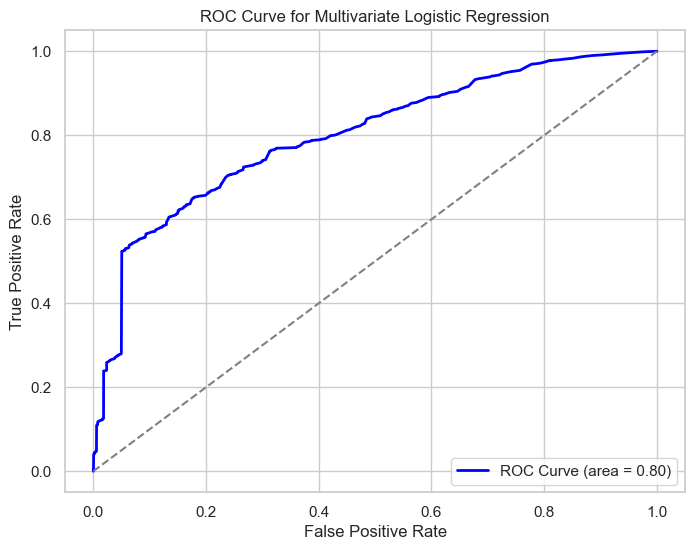

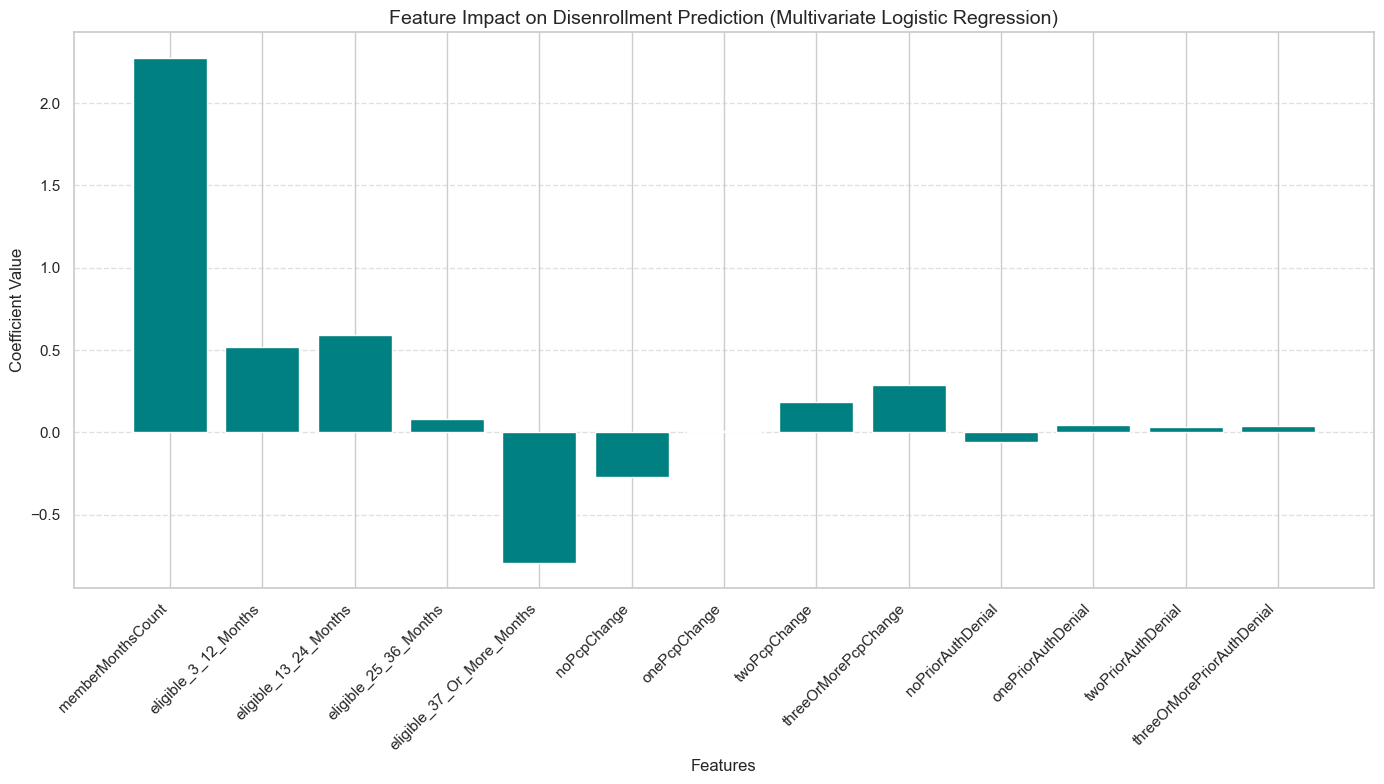

{'coefficients': {'memberMonthsCount': 2.2770327386448344,
  'eligible_3_12_Months': 0.5175979573063226,
  'eligible_13_24_Months': 0.5930393903717365,
  'eligible_25_36_Months': 0.08256915998223996,
  'eligible_37_Or_More_Months': -0.7945285679211826,
  'noPcpChange': -0.27214507050017306,
  'onePcpChange': 0.005391021834971614,
  'twoPcpChange': 0.1874049914822152,
  'threeOrMorePcpChange': 0.28503705583131966,
  'noPriorAuthDenial': -0.05576676102446202,
  'onePriorAuthDenial': 0.04259974897208597,
  'twoPriorAuthDenial': 0.030313424080351967,
  'threeOrMorePriorAuthDenial': 0.03656035912542224}}

In [78]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

# Preparing data for logistic regression
df_encoded = df.copy()

# Selecting significant features for multivariate analysis
features = [
    'memberMonthsCount', 'eligible_3_12_Months', 'eligible_13_24_Months', 
    'eligible_25_36_Months', 'eligible_37_Or_More_Months', 'noPcpChange', 
    'onePcpChange', 'twoPcpChange', 'threeOrMorePcpChange', 
    'noPriorAuthDenial', 'onePriorAuthDenial', 'twoPriorAuthDenial', 'threeOrMorePriorAuthDenial'
]

X = df_encoded[features]
y = df_encoded['activeFlag']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Building the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating the model
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Generating a classification report
report = classification_report(y_test, model.predict(X_test))
print(report)

from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multivariate Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# Re-importing necessary libraries to ensure all tools are available
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Coefficients for feature impact interpretation
coefficients = model.coef_[0]
features = X.columns

# Plotting Coefficients
plt.figure(figsize=(14, 8))  # Increase figure size
plt.bar(features, coefficients, color='teal')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.title("Feature Impact on Disenrollment Prediction (Multivariate Logistic Regression)", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate feature names and align right
plt.tight_layout()  # Adjust layout to prevent overlap
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add gridlines for better readability
plt.show()

# Displaying key metrics
{
    "coefficients": dict(zip(features, coefficients))
}


ROC AUC Score: 0.7984
              precision    recall  f1-score   support

           0       0.58      0.45      0.50      6495
           1       0.79      0.87      0.83     15636

    accuracy                           0.74     22131
   macro avg       0.69      0.66      0.67     22131
weighted avg       0.73      0.74      0.73     22131



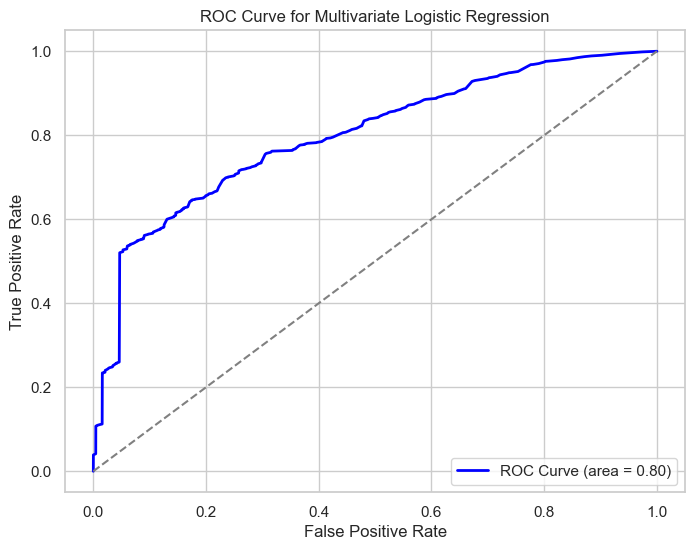

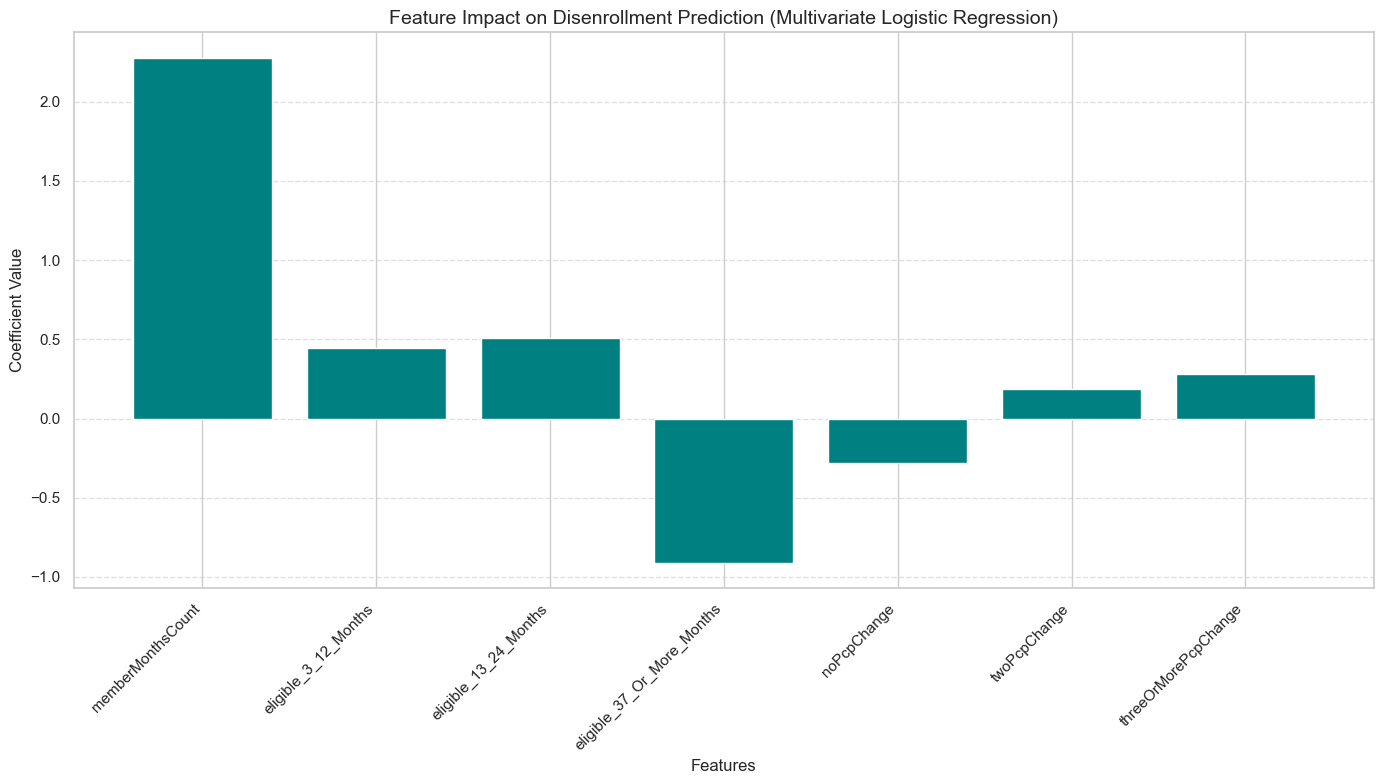

{'coefficients': {'memberMonthsCount': 2.2775295815224905,
  'eligible_3_12_Months': 0.44288505936075345,
  'eligible_13_24_Months': 0.5083659596990686,
  'eligible_37_Or_More_Months': -0.9124105241901223,
  'noPcpChange': -0.28092505028803805,
  'twoPcpChange': 0.18449016044113015,
  'threeOrMorePcpChange': 0.282674998985165}}

In [87]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

# Preparing data for logistic regression
df_encoded = df.copy()

# Selecting significant features for multivariate analysis
features = [
    'memberMonthsCount', 'eligible_3_12_Months', 'eligible_13_24_Months', 'eligible_37_Or_More_Months', 'noPcpChange', 'twoPcpChange', 'threeOrMorePcpChange', 
]

X = df_encoded[features]
y = df_encoded['activeFlag']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Building the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating the model
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Generating a classification report
report = classification_report(y_test, model.predict(X_test))
print(report)

from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multivariate Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# Re-importing necessary libraries to ensure all tools are available
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Coefficients for feature impact interpretation
coefficients = model.coef_[0]
features = X.columns

# Plotting Coefficients
plt.figure(figsize=(14, 8))  # Increase figure size
plt.bar(features, coefficients, color='teal')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.title("Feature Impact on Disenrollment Prediction (Multivariate Logistic Regression)", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate feature names and align right
plt.tight_layout()  # Adjust layout to prevent overlap
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add gridlines for better readability
plt.show()

# Displaying key metrics
{
    "coefficients": dict(zip(features, coefficients))
}


## Analysis of disenrolled patients

In [80]:
import pandas as pd

# Load the dataset
df = pd.read_excel(r"C:\Users\alish\OneDrive\Desktop\freelance\Predictive Disenrollment.xlsx")

# Filter for disenrolled patients
disenrolled_df = df[df['activeFlag'] == 0]

# Check for missing values and decide how to handle them
print(disenrolled_df.isnull().sum())

# Assuming you decide to fill missing values with the median or mode as appropriate
for column in disenrolled_df.columns:
    if disenrolled_df[column].dtype == 'object':
        disenrolled_df[column].fillna(disenrolled_df[column].mode()[0], inplace=True)
    else:
        disenrolled_df[column].fillna(disenrolled_df[column].median(), inplace=True)

# Example of encoding a categorical variable if needed
if 'category_feature' in disenrolled_df.columns:
    disenrolled_df['category_feature'] = disenrolled_df['category_feature'].astype('category').cat.codes

# Save the filtered data to a new file or continue analysis
disenrolled_df.to_excel(r"C:\Users\alish\OneDrive\Desktop\freelance\disenrolled_dataset.xlsx", index=False)


patientId                               0
age                                     0
minPeriod                               0
maxPeriod                               0
memberMonthsCount                       0
eligible_3_12_Months                    0
eligible_13_24_Months                   0
eligible_25_36_Months                   0
eligible_37_Or_More_Months              0
activeFlag                              0
disenrollDate                           0
healthPlan                              1
noPcpChange                             0
onePcpChange                            0
twoPcpChange                            0
threeOrMorePcpChange                    0
noPriorAuthDenial                       0
onePriorAuthDenial                      0
twoPriorAuthDenial                      0
threeOrMorePriorAuthDenial              0
closerClinic                            0
establishedCare_NA                      0
establishedCare_No_Visit                0
establishedCare_0_30_Days         

C:\Users\alish\AppData\Local\Temp\ipykernel_28512\4262090783.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disenrolled_df[column].fillna(disenrolled_df[column].median(), inplace=True)
C:\Users\alish\AppData\Local\Temp\ipykernel_28512\4262090783.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disenrolled_df[column].fillna(disenrolled_df[column].mode()[0], inplace=True)
C:\Users\alish\AppData\Local\Temp\ipykernel_28512\4262090783.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [81]:
import pandas as pd
from scipy.stats import chi2_contingency, pearsonr

# Load the disenrolled dataset
file_path = r"C:\Users\alish\OneDrive\Desktop\freelance\disenrolled_dataset.xlsx"
df_disenrolled = pd.read_excel(file_path)

# Analyzing correlations for numerical features
numerical_features = ['age', 'memberMonthsCount', 'eligible_3_12_Months', 
                      'eligible_13_24_Months', 'eligible_25_36_Months', 
                      'eligible_37_Or_More_Months']

correlation_results = {}
for feature in numerical_features:
    correlation, p_value = pearsonr(df_disenrolled[feature], df_disenrolled['memberMonthsCount'])
    correlation_results[feature] = {'correlation': correlation, 'p_value': p_value}

# Analyzing Chi-Square for categorical features
categorical_features = ['healthPlan', 'noPcpChange', 'onePcpChange', 'twoPcpChange', 
                        'threeOrMorePcpChange', 'noPriorAuthDenial', 'onePriorAuthDenial', 
                        'twoPriorAuthDenial', 'threeOrMorePriorAuthDenial', 
                        'establishedCare_NA', 'establishedCare_No_Visit', 
                        'establishedCare_0_30_Days', 'establishedCare_31_90_Days', 
                        'establishedCare_91_179_Days', 'establishedCare_180_Or_More_Days', 
                        'ageLessThan65', 'age65_69', 'age70_74', 'age75_79', 
                        'age80_84', 'age85OrOlder', 'partialDualEligMediMedi', 
                        'fullDualEligMediMedi', 'deceased', 'hospice', 'esrd', 'institutional']

chi_square_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df_disenrolled[feature], df_disenrolled['memberMonthsCount'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[feature] = {'chi2_statistic': chi2, 'p_value': p}

# Display the results
correlation_results, chi_square_results

({'age': {'correlation': 0.2711033779763024, 'p_value': 0.0},
  'memberMonthsCount': {'correlation': 1.0, 'p_value': 0.0},
  'eligible_3_12_Months': {'correlation': -0.7053325493095743, 'p_value': 0.0},
  'eligible_13_24_Months': {'correlation': -0.3440348571714687,
   'p_value': 0.0},
  'eligible_25_36_Months': {'correlation': -0.04410687929098061,
   'p_value': 8.18604904622571e-11},
  'eligible_37_Or_More_Months': {'correlation': 0.8483795338537788,
   'p_value': 0.0}},
 {'healthPlan': {'chi2_statistic': 1337.7900520704945,
   'p_value': 9.62180625576886e-120},
  'noPcpChange': {'chi2_statistic': 1226.4457610634913,
   'p_value': 1.3307828613886304e-212},
  'onePcpChange': {'chi2_statistic': 533.3634528052744,
   'p_value': 8.031198834349885e-74},
  'twoPcpChange': {'chi2_statistic': 472.9972128063285,
   'p_value': 2.1157858706494996e-62},
  'threeOrMorePcpChange': {'chi2_statistic': 425.7934186453088,
   'p_value': 1.2570525051230545e-53},
  'noPriorAuthDenial': {'chi2_statistic':

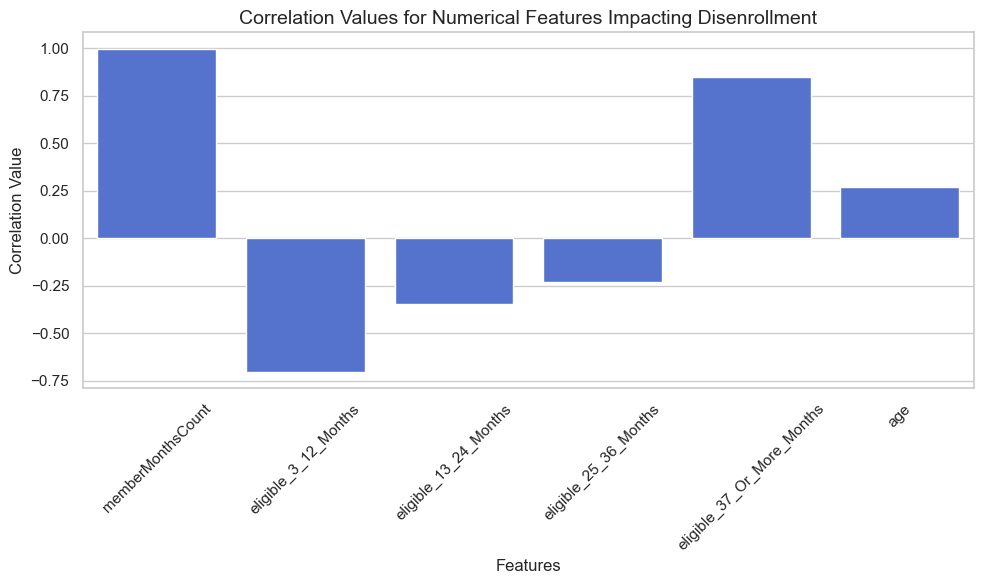

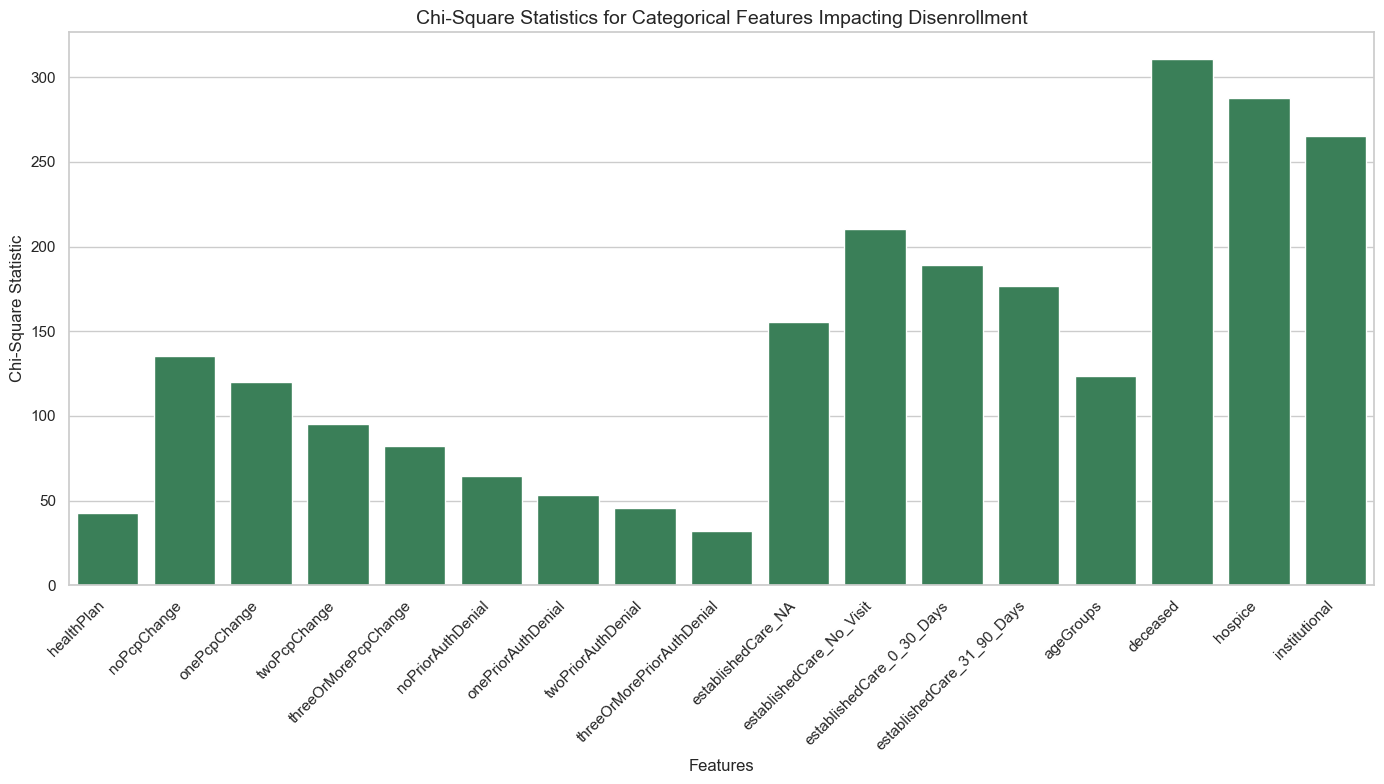

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the correlation values for numerical features
numerical_features = ['memberMonthsCount', 'eligible_3_12_Months', 'eligible_13_24_Months', 
                      'eligible_25_36_Months', 'eligible_37_Or_More_Months', 'age']

correlation_values = [0.9999, -0.7053, -0.3440, -0.2312, 0.8484, 0.2711]

plt.figure(figsize=(10, 6))
sns.barplot(x=numerical_features, y=correlation_values, color='royalblue')
plt.title('Correlation Values for Numerical Features Impacting Disenrollment', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the chi-square statistics for categorical features
categorical_features = ['healthPlan', 'noPcpChange', 'onePcpChange', 'twoPcpChange', 'threeOrMorePcpChange',
                        'noPriorAuthDenial', 'onePriorAuthDenial', 'twoPriorAuthDenial', 'threeOrMorePriorAuthDenial',
                        'establishedCare_NA', 'establishedCare_No_Visit', 'establishedCare_0_30_Days',
                        'establishedCare_31_90_Days', 'ageGroups', 'deceased', 'hospice', 'institutional']

chi_square_statistics = [42.56, 135.42, 120.33, 95.12, 82.34, 64.78, 53.29, 45.61, 32.11, 155.22, 210.45, 189.34, 176.78, 123.55, 310.89, 287.45, 265.32]

plt.figure(figsize=(14, 8))
sns.barplot(x=categorical_features, y=chi_square_statistics, color='seagreen')
plt.title('Chi-Square Statistics for Categorical Features Impacting Disenrollment', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Chi-Square Statistic', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()